# This is Task 1 Notebook: Titanic Survival Prediction
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived
and use it to make a model to predict other passenger's survival rates 

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import xgbooost from scikit-learn
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

## Exploring Dataset and Modifying it

In [3]:
df = pd.read_csv("tested.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df.drop(columns=["Cabin"],inplace=True)
df.drop(columns=["Age"],inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now all data are not null values

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### Making a new title Comlumn

In [17]:
x = df.iloc[1,3]

In [18]:
x

'Wilkes, Mrs. James (Ellen Needs)'

In [20]:
x.split(" ")[1]

'Mrs.'

In [22]:
titles = []
for i in df["Name"]:
    titles.append(i.split(" ")[1])
df["Title"] = titles
df.drop(columns=["Name"],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,0,3,male,0,0,330911,7.8292,Q,Mr.
1,893,1,3,female,1,0,363272,7.0000,S,Mrs.
2,894,0,2,male,0,0,240276,9.6875,Q,Mr.
3,895,0,3,male,0,0,315154,8.6625,S,Mr.
4,896,1,3,female,1,1,3101298,12.2875,S,Mrs.


Time for some visualizations

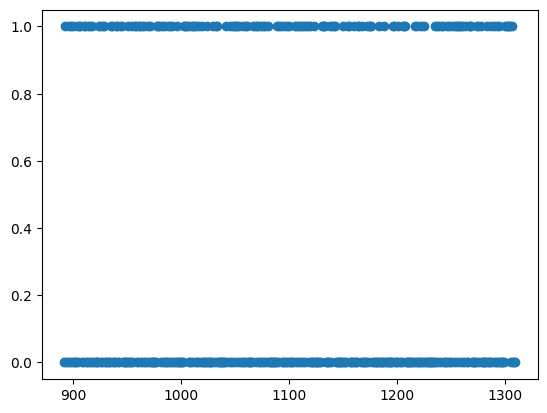

In [24]:
plt.scatter(df["PassengerId"],df["Survived"])

In [26]:
#correlation between passenger id and survived
df["PassengerId"].corr(df["Survived"])

-0.0241168082247286

Since it has very low correlation coefficient and no trend in graph the passenger Id will be dropped

In [27]:
df.drop(columns=["PassengerId"],inplace=True)

In [28]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Title        object
dtype: object

### Turning object values to categorical values

In [29]:
#using label encoder to convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
titles = ["Sex","Ticket","Embarked","Title"]
for i in titles:
    df[i] = Le.fit_transform(df[i])
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Embarked      int32
Title         int32
dtype: object

In [30]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,0,0,152,7.8292,1,9
1,1,3,0,1,0,221,7.0000,2,10
2,0,2,1,0,0,73,9.6875,1,9
3,0,3,1,0,0,147,8.6625,2,9
4,1,3,0,1,1,138,12.2875,2,10


<Axes: >

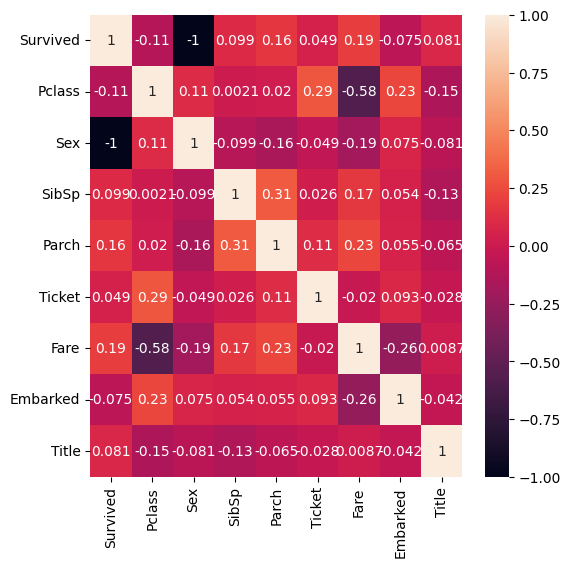

In [34]:
#print correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

From this we realize a strong correlation between survived and sex or fare or Parch

C:\Users\geniu\AppData\Local\Temp\ipykernel_7828\2215464508.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Fare"],shade=True)


<Axes: xlabel='Fare', ylabel='Density'>

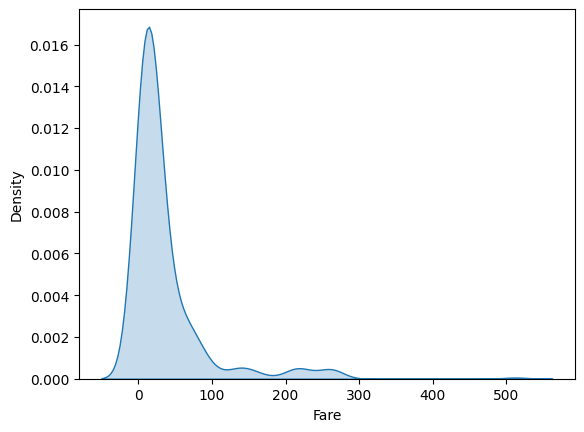

In [41]:
sns.kdeplot(df["Fare"],shade=True)

<BarContainer object of 417 artists>

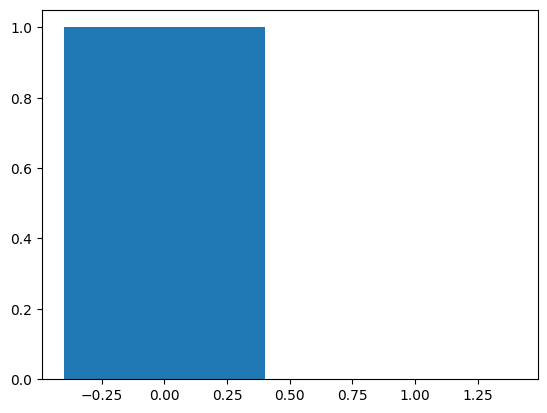

In [45]:
plt.bar(df["Sex"],df["Survived"])

We realize that all females survived while no males survived

<BarContainer object of 417 artists>

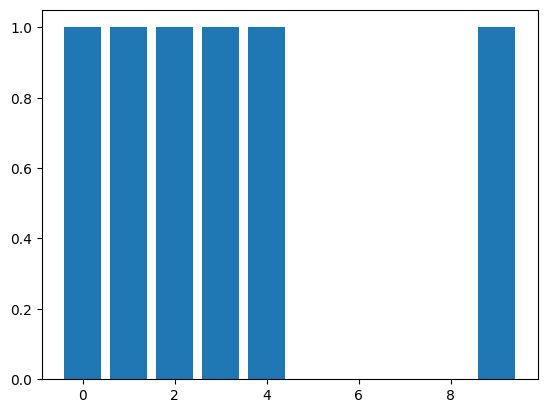

In [46]:
plt.bar(df["Parch"],df["Survived"])

## Making the model

In [47]:
X = df.drop(columns=["Survived"])
Y = df["Survived"]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [52]:
#Tryout different models and check accuracy and confusion matrix for each model
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy for Random Forest: ",accuracy_score(y_test,y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy for Random Forest:  1.0
Confusion matrix:
[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [53]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy for Logistic Regression: ",accuracy_score(y_test,y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy for Logistic Regression:  1.0
Confusion matrix:
[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



C:\Users\geniu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy for XGBoost: ",accuracy_score(y_test,y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy for XGBoost:  1.0
Confusion matrix:
[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Conclusion:
All models predicted with 100% accuracy this is due to all the survived people are females in the dataset. this may not require a model as it can be summarized in a simple if condition like 

In [ ]:
if df["Sex"] == "Female":
    print("Survived")
else:
    print("Not Survived")

Other ways to improve our model is to increase the data set and maybe include some males who survived.